# Retrieving OpenStreetMap data

![](img/OSM_logo.png)

## What is OpenStreetMap?

OpenStreetMap (OSM) is a global collaborative (crowd-sourced) dataset and project that aims at creating a free editable map of the world containing a lot of information about our environment.
It contains data for example about streets, buildings, different services, and landuse to mention a few. You can view the map at www.openstreetmap.org. You can also sign up as a contributor if you want to edit the map. More details about OpenStreetMap and its contents are available in the [OpenStreetMap Wiki](https://wiki.openstreetmap.org/wiki/Main_Page).

OSM has a large userbase with more than 4 million users and over a million contributers that update actively the OSM database with 3 million changesets per day. In total OSM contains 5 billion nodes and counting! ([stats from November 2019](http://wiki.openstreetmap.org/wiki/Stats)).

OpenStreetMap is used not only for integrating the **OSM maps** as background maps to visualizations or online maps, but also for many other purposes such as **routing**, **geocoding**, **education**, and **research**. OSM is also widely used for humanitarian response e.g. in crisis areas (e.g. after natural disasters) and for fostering economic development. Read more about humanitarian projects that use OSM data from the [Humanitarian OpenStreetMap Team (HOTOSM) website](https://www.hotosm.org).


## Main tools in this lesson

### OSMnx

This week we will explore a Python module called [OSMnx](https://github.com/gboeing/osmnx)
that can be used to retrieve, construct, analyze, and visualize street networks from OpenStreetMap, and also retrieve data about Points of Interest such as restaurants, schools, and lots of different kind of services. It is also easy to conduct network routing based on walking, cycling or driving by combining OSMnx functionalities with a package called [NetworkX](https://networkx.github.io/documentation/stable/).

To get an overview of the capabilities of the package, see an introductory video given by the lead developer of the package, Prof. Geoff Boeing: ["Meet the developer: Introduction to OSMnx package by Geoff Boeing"](https://www.youtube.com/watch?v=Q0uxu25ddc4&list=PLs9D4XVqc6dCAhhvhZB7aHGD8fCeCC_6N).

There is also a scientific article available describing the package:

> Boeing, G. 2017. ["OSMnx: New Methods for Acquiring, Constructing, Analyzing, and Visualizing Complex Street Networks."](https://www.researchgate.net/publication/309738462_OSMnx_New_Methods_for_Acquiring_Constructing_Analyzing_and_Visualizing_Complex_Street_Networks) Computers, Environment and Urban Systems 65, 126-139. doi:10.1016/j.compenvurbsys.2017.05.004


[This tutorial](https://github.com/gboeing/osmnx-examples/blob/master/notebooks/01-overview-osmnx.ipynb) provides a practical overview of OSMnx functionalities, and has also inspired this AutoGIS lesson.

*Note: major changes were implemented in OSMnx versions > 0.9. This lesson has been updated accordingly.*

</div>

### NetworkX

We will also use [NetworkX](https://networkx.github.io/documentation/stable/) to for manipulating and analyzing the street network data retrieved from OpenSTreetMap. NetworkX is a Python package that can be used to create, manipulate, and study the structure, dynamics, and functions of complex networks. Networkx module contains algorithms that can be used to calculate [shortest paths](https://networkx.github.io/documentation/networkx-1.10/reference/algorithms.shortest_paths.html)
along road networks using e.g. [Dijkstra's](https://en.wikipedia.org/wiki/Dijkstra%27s_algorithm) or [A\* algorithm](https://en.wikipedia.org/wiki/A*_search_algorithm).

## Download and visualize OpenStreetMap data with OSMnx

One the most useful features that OSMnx provides is an easy-to-use way of retrieving [OpenStreetMap](http://www.openstreetmap.org) data using [OverPass API](http://wiki.openstreetmap.org/wiki/Overpass_API) in the background. In this tutorial, we will learn how to download and visualize the street network and additional data from OpenStreetMap covering a specified area of interest.

### Street network

The [osmnx.graph -module](https://osmnx.readthedocs.io/en/stable/osmnx.html?highlight=graph_from#module-osmnx.graph) enables downloading and constructing a routable road network graph based on user-defined area of interest. The user can specify the area of interest, for example using a placename, a bounding box or a polygon. Here, we will use a placename for fetching data from the Long Beach area in California, USA. In the place name query, OSMnx uses the Nominatim Geocoding API.

In [20]:
import osmnx as ox
import matplotlib.pyplot as plt

Let's start by specifying ``"Long Beach, California, United States of America"`` as the place from where the data should be downloaded. The place name should be *geocodable* which means that the place name should exist in the OpenStreetMap database (you can do a test search at https://www.openstreetmap.org/ or at https://nominatim.openstreetmap.org/ to verify that the place name is valid).  

In [21]:
# Specify the name that is used to seach for the data
place_name = "Los Angeles, California, United States of America"

Next, we will read in the OSM street network using OSMnx using the [graph_from_place](https://osmnx.readthedocs.io/en/stable/osmnx.html?highlight=graph%20from#osmnx.graph.graph_from_place) function:

In [22]:
# Fetch OSM street network from the location
graph = ox.graph_from_place(place_name)

Check the data type of the graph:

In [23]:
type(graph)

networkx.classes.multidigraph.MultiDiGraph

What we have here is a networkx [MultiDiGraph](https://networkx.org/documentation/networkx-1.10/reference/classes.multidigraph.html) object. 

Let's have a closer look a the street nework. OSMnx has its own function [plot_graph()](https://osmnx.readthedocs.io/en/stable/osmnx.html?highlight=plot_graph#osmnx.plot.plot_graph) for visualizing graph objects. The function utilizes Matplotlib for visualizing the data,
hence as a result it returns a matplotlib figure and axis objects:


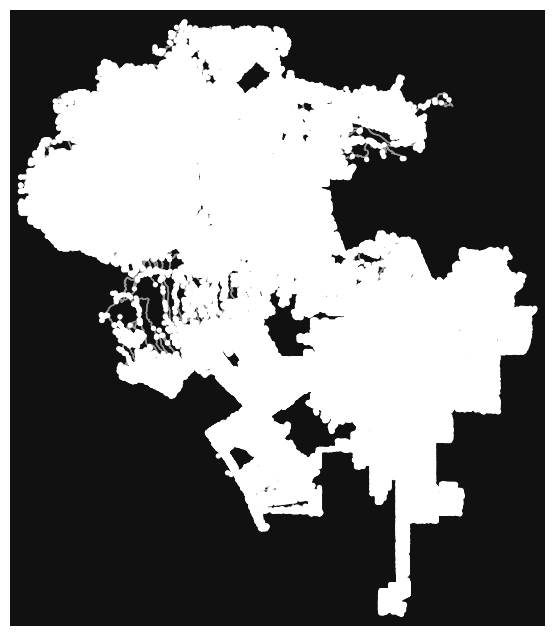

In [24]:
# Plot the streets
fig, ax = ox.plot_graph(graph)

Great! Now we can see that our graph contains nodes (the points) and edges (the lines) that connects those nodes to each other.


### Graph to GeoDataFrame

We can now plot all these different OSM layers by using the familiar `plot()` function of geopandas. As you might remember, the street network data is not a GeoDataFrame, but a graph object. Luckily, OSMnx provides a convenient function `graph_to_gdfs()` that can convert the graph into two separate GeoDataFrames where the first one contains the information about the nodes and the second one about the edge.

Let's extract the nodes and edges from the graph as GeoDataFrames:

In [25]:
# Retrieve nodes and edges
nodes, edges = ox.graph_to_gdfs(graph)

In [26]:
nodes.head()

,y,x,highway,street_count,ref,geometry
osmid,,,,,,
653688,34.027025,-118.429548,traffic_signals,3,NaN,POINT (-118.42955 34.02703)
653689,34.028639,-118.425473,traffic_signals,4,NaN,POINT (-118.42547 34.02864)
653690,34.030125,-118.421841,NaN,4,NaN,POINT (-118.42184 34.03013)
653691,34.031147,-118.419979,NaN,3,NaN,POINT (-118.41998 34.03115)
653693,34.032444,-118.417590,traffic_signals,5,NaN,POINT (-118.41759 34.03244)


In [27]:
edges.head()

osmid lanes  \
u      v          key                                            
653688 4954137120 0                            398770659     6   
       1614655105 0    [398770658, 759468526, 759468527]     4   
653689 8495947173 0                            398771138     5   
       8495947176 0                            404964730     5   
       8495947175 0                            643327598   NaN   

                                     name    highway maxspeed  oneway  \
u      v          key                                                   
653688 4954137120 0    National Boulevard  secondary   35 mph   False   
       1614655105 0    National Boulevard  secondary   35 mph   False   
653689 8495947173 0    National Boulevard  secondary   35 mph   False   
       8495947176 0    National Boulevard  secondary   35 mph   False   
       8495947175 0       Military Avenue   tertiary      NaN   False   

                      reversed   length tunnel  \
u      v          key                            
653688 4954137120 0      False    6.560    NaN   
       1614655105 0       True  102.260    yes   
653689 8495947173 0      False    9.492    NaN   
       8495947176 0       True    8.902    NaN   
       8495947175 0      False   10.848    NaN   

                                                                geometry  \
u      v          key                                                      
653688 4954137120 0    LINESTRING (-118.42955 34.02703, -118.42948 34...   
       1614655105 0    LINESTRING (-118.42955 34.02703, -118.42980 34...   
653689 8495947173 0    LINESTRING (-118.42547 34.02864, -118.42538 34...   
       8495947176 0    LINESTRING (-118.42547 34.02864, -118.42556 34...   
       8495947175 0    LINESTRING (-118.42547 34.02864, -118.42554 34...   

                      bridge  ref service access width junction area  
u      v          key                                                 
653688 4954137120 0      NaN  NaN     NaN    NaN   NaN      NaN  NaN  
       1614655105 0      NaN  NaN     NaN    NaN   NaN      NaN  NaN  
653689 8495947173 0      NaN  NaN     NaN    NaN   NaN      NaN  NaN  
       8495947176 0      NaN  NaN     NaN    NaN   NaN      NaN  NaN  
       8495947175 0      NaN  NaN     NaN    NaN   NaN      NaN  NaN

Nice! Now, as we can see, we have our graph as GeoDataFrames and we can plot them using the same functions and tools as we have used before.

### Place polygon

Let's also plot the Polygon that represents our area of interest (Long Beach, California). We can retrieve the Polygon geometry using the [geocode_to_gdf()](https://osmnx.readthedocs.io/en/stable/osmnx.html?highlight=geocode_to_gdf(#osmnx.geocoder.geocode_to_gdf) -function.

In [28]:
# Get place boundary related to the place name as a geodataframe
area = ox.geocode_to_gdf(place_name)

As the name of the function already tells us, it returns a GeoDataFrame object based on the specified place name query.
Let's still verify the data type: 

In [29]:
# Check the data type
type(area)

geopandas.geodataframe.GeoDataFrame

Let's also have a look at the data:

In [30]:
# Check data values
area

,geometry,bbox_north,bbox_south,bbox_east,bbox_west,place_id,osm_type,osm_id,lat,lon,display_name,class,type,importance
0,"POLYGON ((-118.66818 34.18771, -118.66817 34.1...",34.337306,33.659541,-118.155295,-118.668178,355412804,relation,207359,34.053691,-118.242766,"Los Angeles, Los Angeles County, CAL Fire Cont...",boundary,administrative,1.283805


<AxesSubplot: >

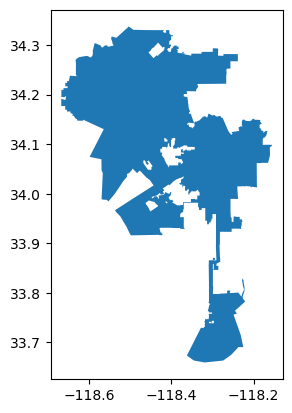

In [31]:
# Plot the area:
area.plot()

### Building footprints

It is also possible to retrieve other types of OSM data features with OSMnx such as buildings or points of interest (POIs). Let's download the buildings with `OSMnx` [geometries_from_place()](https://osmnx.readthedocs.io/en/stable/osmnx.html?highlight=geometries_from_place#osmnx.geometries.geometries_from_place) -function and plot them on top of our street network in Long Beach. 

When fetching spesific types of geometries from OpenStreetMap using OSMnx `geometries_from_place` we also need to specify the correct tags. For getting [all types of buildings](https://wiki.openstreetmap.org/wiki/Buildings), we can use the tag `building=yes`.

In [32]:
# List key-value pairs for tags
tags = {'building': 'yes'}

In [33]:
buildings = ox.geometries_from_place(place_name, tags)

Let's check how many building footprints we received:

In [34]:
len(buildings)

51158

Let's also have a look at the data:

In [35]:
buildings.head()

amenity                     geometry access parking  \
element_type osmid                                                           
node         368166528     NaN  POINT (-118.29424 34.10029)    NaN     NaN   
             368166532     NaN  POINT (-118.47430 33.98653)    NaN     NaN   
             368167018     NaN  POINT (-118.20896 34.04529)    NaN     NaN   
             368167023     NaN  POINT (-118.27035 34.04946)    NaN     NaN   
             368167027     NaN  POINT (-118.28229 33.73946)    NaN     NaN   

                       addr:state building  ele gnis:county_name  \
element_type osmid                                                 
node         368166528         CA      yes  151      Los Angeles   
             368166532         CA      yes    4      Los Angeles   
             368167018         CA      yes  100      Los Angeles   
             368167023         CA      yes   79      Los Angeles   
             368167027         CA      yes   12      Los Angeles   

                       gnis:feature_id                      gnis:import_uuid  \
element_type osmid                                                             
node         368166528         1682177  57871b70-0100-4405-bb30-88b2e001a944   
             368166532         1702778  57871b70-0100-4405-bb30-88b2e001a944   
             368167018         1878583  57871b70-0100-4405-bb30-88b2e001a944   
             368167023         1877986  57871b70-0100-4405-bb30-88b2e001a944   
             368167027         1878185  57871b70-0100-4405-bb30-88b2e001a944   

                        ... service:vehicle:services ship source:url  \
element_type osmid      ...                                            
node         368166528  ...                      NaN  NaN        NaN   
             368166532  ...                      NaN  NaN        NaN   
             368167018  ...                      NaN  NaN        NaN   
             368167023  ...                      NaN  NaN        NaN   
             368167027  ...                      NaN  NaN        NaN   

                       internet_access:ssid school ways  \
element_type osmid                                        
node         368166528                  NaN    NaN  NaN   
             368166532                  NaN    NaN  NaN   
             368167018                  NaN    NaN  NaN   
             368167023                  NaN    NaN  NaN   
             368167027                  NaN    NaN  NaN   

                       addr:street_direction_prefix contact:email ref:walmart  \
element_type osmid                                                              
node         368166528                          NaN           NaN         NaN   
             368166532                          NaN           NaN         NaN   
             368167018                          NaN           NaN         NaN   
             368167023                          NaN           NaN         NaN   
             368167027                          NaN           NaN         NaN   

                       moved_to  
element_type osmid               
node         368166528      NaN  
             368166532      NaN  
             368167018      NaN  
             368167023      NaN  
             368167027      NaN  

[5 rows x 388 columns]

As you can see, there are several columns in the buildings-layer. Each column contains information about a spesific tag that OpenStreetMap contributors have added. Each tag consists of a key (the column name), and several potential values (for example `building=yes` or `building=school`). Read more about tags and tagging practices in the [OpenStreetMap wiki](https://wiki.openstreetmap.org/wiki/Tags). 

In [36]:
buildings.columns

Index(['amenity', 'geometry', 'access', 'parking', 'addr:state', 'building',
       'ele', 'gnis:county_name', 'gnis:feature_id', 'gnis:import_uuid',
       ...
       'service:vehicle:services', 'ship', 'source:url',
       'internet_access:ssid', 'school', 'ways',
       'addr:street_direction_prefix', 'contact:email', 'ref:walmart',
       'moved_to'],
      dtype='object', length=388)

### Points-of-interest

It is also possible to retrieve other types of geometries from OSM using the `geometries_from_place` by passing different tags. Point-of-interest (POI) is a generic concept that describes point locations that represent places of interest. 

In OpenStreetMap, many POIs are described using the [amenity-tags](https://wiki.openstreetmap.org/wiki/Key:amenityhttps://wiki.openstreetmap.org/wiki/Key:amenity). 
We can, for excample, retrieve all restaurat locations by referring to the tag `amenity=restaurant`. See all available amenity categories from [OSM wiki](https://wiki.openstreetmap.org/wiki/Key:amenity). 

*Note: We used the `pois_from_place()` method to retrieve POIs in older versions of OSMnx.*

Let's retrieve restaurants that are located in our area of interest:

In [37]:
# List key-value pairs for tags
tags = {'amenity': 'restaurant'}

In [38]:
# Retrieve restaurants
restaurants = ox.geometries_from_place(place_name, tags)

# How many restaurants do we have?
len(restaurants)

2180

As we can see, there are quite many restaurants in the area.

Let's explore what kind of attributes we have in our restaurants GeoDataFrame:

In [39]:
# Available columns
restaurants.columns.values

array(['amenity', 'created_by', 'cuisine', 'name', 'geometry',
       'addr:housenumber', 'addr:street', 'opening_hours', 'phone',
       'website', 'addr:city', 'addr:postcode', 'addr:state', 'fax',
       'brand', 'brand:wikidata', 'brand:wikipedia', 'name:ko', 'bar',
       'contact:email', 'contact:phone', 'name:en', 'smoking', 'takeaway',
       'toilets', 'wheelchair', 'wikidata', 'alt_name', 'historic',
       'wikipedia', 'air_conditioning', 'outdoor_seating', 'reservation',
       'addr:country', 'alcohol', 'name:zh', 'addr:housename',
       'addr:full', 'cocktails', 'drink:beer', 'drink:liquor',
       'drink:wine', 'start_date', 'short_name', 'note', 'addr:unit',
       'check_date:opening_hours', 'contact:facebook',
       'contact:instagram', 'diet:vegan', 'source', 'check_date',
       'internet_access', 'internet_access:fee', 'level', 'payment:cards',
       'payment:credit_cards', 'payment:debit_cards', 'addr:floor', 'ele',
       'diet:gluten_free', 'diet:vegetarian',

As you can see, there is quite a lot of (potential) information related to the amenities. Let's subset the columns and inspect the data further. Useful columns include at least `name`, `address information` and `opening_hours` information:

In [40]:
# Select some useful cols and print
cols = ['name', 'opening_hours', 'addr:city', 'addr:state', 
        'addr:housenumber', 'addr:postcode', 'addr:street']

# Print only selected cols
restaurants[cols].head(10)

name  \
element_type osmid                                    
node         349338599                   Big Wang's   
             349338821                    Cafe Etc.   
             353942568                    Pizza Hut   
             360256621                     Giamelas   
             360258364                          NaN   
             408540804                 Tofu Village   
             416766635      Danny's Bistro and Cafe   
             441941600                 Natalee Thai   
             455670372  Mario's Peruvian Restaurant   
             464745080                          NaN   

                                             opening_hours addr:city  \
element_type osmid                                                     
node         349338599                                 NaN       NaN   
             349338821  Mo-Fr 7:00-21:00; Sa-Su 7:00-21:00       NaN   
             353942568                                 NaN       NaN   
             360256621                                 NaN       NaN   
             360258364                                 NaN       NaN   
             408540804                                 NaN       NaN   
             416766635                                 NaN       NaN   
             441941600                                 NaN       NaN   
             455670372                                 NaN       NaN   
             464745080                                 NaN       NaN   

                       addr:state addr:housenumber addr:postcode   addr:street  
element_type osmid                                                              
node         349338599        NaN              NaN           NaN           NaN  
             349338821        NaN             6371           NaN  Selma Avenue  
             353942568        NaN              NaN           NaN           NaN  
             360256621        NaN              NaN           NaN           NaN  
             360258364        NaN              NaN           NaN           NaN  
             408540804        NaN              NaN           NaN           NaN  
             416766635        NaN              NaN           NaN           NaN  
             441941600        NaN              NaN           NaN           NaN  
             455670372        NaN              NaN           NaN           NaN  
             464745080        NaN              NaN           NaN           NaN

As we can see, there is a lot of useful information about restaurants that can be retrieved easily with OSMnx. Also, if some of the information need updating, you can go over to www.openstreetmap.org and edit the source data! :)

### Plotting the data

Let's create a map out of the streets, buildings, restaurants, and the area Polygon but let's exclude the nodes (to keep the figure clearer).

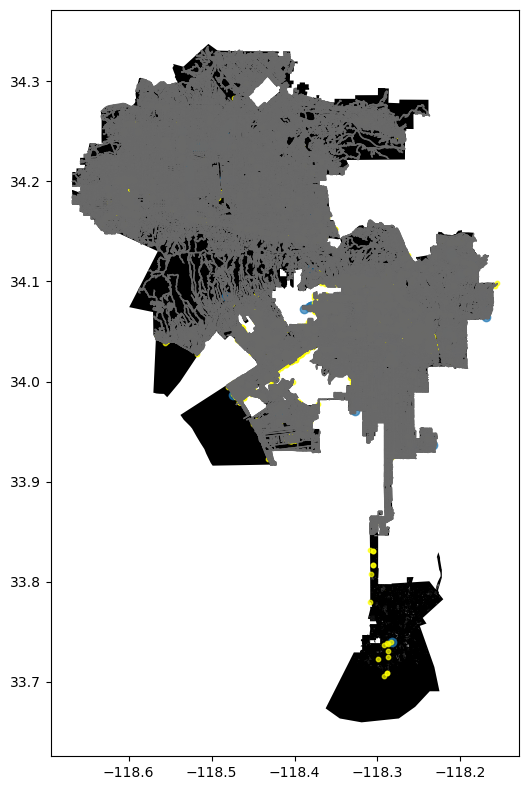

In [41]:
fig, ax = plt.subplots(figsize=(12,8))

# Plot the footprint
area.plot(ax=ax, facecolor='black')

# Plot street edges
edges.plot(ax=ax, linewidth=1, edgecolor='dimgray')

# Plot buildings
buildings.plot(ax=ax, facecolor='silver', alpha=0.7)

# Plot restaurants
restaurants.plot(ax=ax, color='yellow', alpha=0.7, markersize=10)
plt.tight_layout()

Cool! Now we have a map where we have plotted the restaurants, buildings, streets and the boundaries of the selected region of 'Long Beach' in California. And all of this required only a few lines of code. Pretty neat! 


### Extra: Park polygons
Notice that we can retrieve all kinds of different features from OpenStreetMap using the [geometries_from_place()](https://osmnx.readthedocs.io/en/stable/osmnx.html?highlight=geometries_from_place#osmnx.geometries.geometries_from_place) method by passing different OpenStreetMap tags.

Let's try to fetch all public parks in the Long Beach area. In OpenStreetMap, parks are often tagged as `leisure=park`. We can also add other green surfaces, such as `landuse=grass`. see OpenStreetMap, and OSM wiki for more details.

- We need to start by fetching all footprints from the tag `leisure`:

In [42]:
# List key-value pairs for tags
tags = {'leisure': 'park', 'landuse': 'grass'}

In [43]:
# Get the data
parks = ox.geometries_from_place(place_name, tags)

# Check the result
print("Retrieved", len(parks), "objects")

Retrieved 3836 objects


let's check the first rows:

In [44]:
parks.head(3)

access barrier                     geometry highway  \
element_type osmid                                                           
node         358779407    NaN     NaN  POINT (-118.48536 34.17639)     NaN   
             358779974    NaN     NaN  POINT (-118.18955 34.10409)     NaN   
             358781336    NaN     NaN  POINT (-118.28349 33.70989)     NaN   

                        ele gnis:county_id gnis:created gnis:feature_id  \
element_type osmid                                                        
node         358779407  214            037   01/19/1981          238367   
             358779974  198            037   01/19/1981          238773   
             358781336    2            037   01/19/1981          239955   

                       gnis:state_id leisure  ... MTFCC STATEFP Tiger:MTFCC  \
element_type osmid                            ...                             
node         358779407            06    park  ...   NaN     NaN         NaN   
             358779974            06    park  ...   NaN     NaN         NaN   
             358781336            06    park  ...   NaN     NaN         NaN   

                       protect_class name_2 protected_area  FID  \
element_type osmid                                                
node         358779407           NaN    NaN            NaN  NaN   
             358779974           NaN    NaN            NaN  NaN   
             358781336           NaN    NaN            NaN  NaN   

                       source:start_date:url source:start_date:url2 source:url  
element_type osmid                                                              
node         358779407                   NaN                    NaN        NaN  
             358779974                   NaN                    NaN        NaN  
             358781336                   NaN                    NaN        NaN  

[3 rows x 113 columns]

Check all column headers:

In [45]:
parks.columns.values

array(['access', 'barrier', 'geometry', 'highway', 'ele',
       'gnis:county_id', 'gnis:created', 'gnis:feature_id',
       'gnis:state_id', 'leisure', 'name', 'wikidata', 'source', 'area',
       'natural', 'amenity', 'landuse', 'addr:city', 'addr:housenumber',
       'addr:postcode', 'addr:state', 'addr:street', 'operator', 'email',
       'nodes', 'opening_hours', 'phone', 'website', 'created_by',
       'gnis:edited', 'alt_name', 'wikipedia', 'elevation', 'surface',
       'keygnis:state_id', 'attribution', 'boundary', 'csp:globalid',
       'csp:unitcode', 'park:type', 'proposed', 'historic', 'alt_name_1',
       'tourism', 'dog', 'ramp:wheelchair', 'wheelchair', 'building',
       'height', 'lacounty:ain', 'lacounty:bld_id', 'official_name',
       'old_name', 'smoking', 'amusement', 'finely_mow', 'golf', 'ref',
       'sport', 'designation', 'owner', 'ownership', 'landcover', 'note',
       'name:en', 'description', 'fence_type', 'name_1', 'layer',
       'was:name', 'gnis:coun

plot the parks:

<AxesSubplot: >

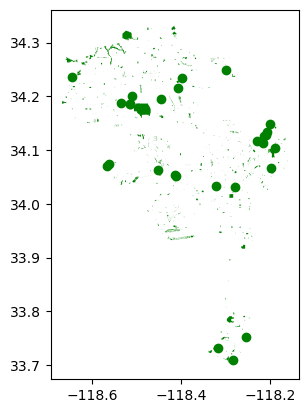

In [46]:
parks.plot(color="green")

Finally, we can add the park polygons to our map:

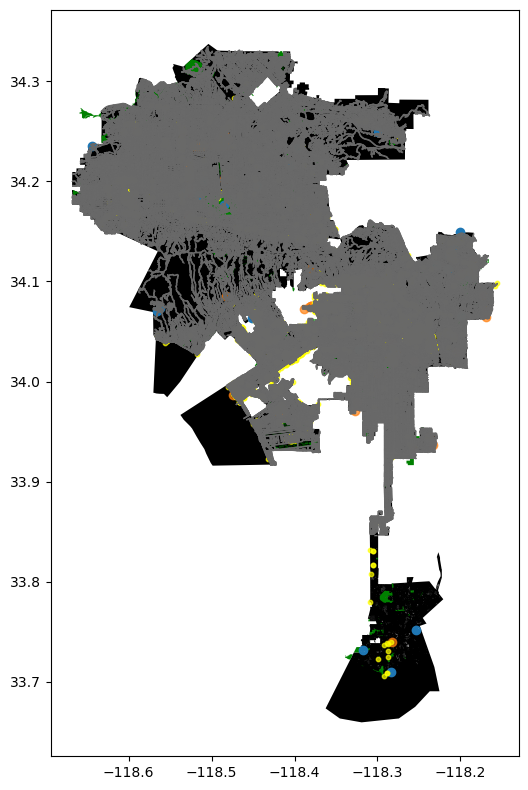

In [47]:
# Create a subplot object for plotting the layers onto a common map
fig, ax = plt.subplots(figsize=(12,8))

# Plot the footprint
area.plot(ax=ax, facecolor='black')

# Plot the parks
parks.plot(ax=ax, facecolor="green")

# Plot street edges
edges.plot(ax=ax, linewidth=1, edgecolor='dimgray')

# Plot buildings
buildings.plot(ax=ax, facecolor='silver', alpha=0.7)

# Plot restaurants
restaurants.plot(ax=ax, color='yellow', alpha=0.7, markersize=10)
plt.tight_layout()

<div class="alert alert-info">

**Check your understading**

Retrieve OpenStreetMap data from some other area! Download these elements using OSMnx functions from your area of interest:
    
- Extent of the area using `geocode_to_gdf()`
- Street network using `graph_from_place()`, and convert to gdf using `graph_to_gdfs()`
- Building footprints (and other geometries) using `geometries_from_place()` and appropriate tags.
    
*Note, the larger the area you choose, the longer it takes to retrieve data from the API! Use parameter `network_type=drive` to limit the graph query to filter out un-driveable roads.*

</div>

In [48]:
# Specify the name that is used to seach for the data. Check that the place name is valid from https://nominatim.openstreetmap.org/ui/search.html
my_place = ""

In [49]:
# Get street network


In [50]:
# Get building footprints


In [51]:
# Plot the data


### Advanced reading

If analyzing OpenStreetMap data over large areas, it is often more efficient and meaningful to download the data all at once, in stead of separate queries to the API. Such data dumps from OpenStreetMap are available in various file formats, OSM [Protocolbuffer Binary Format](https://wiki.openstreetmap.org/wiki/PBF_Format) (PBF) being one of them. Data extracts covering whole countries and continents are available at: https://download.geofabrik.de/europe.html

[Pyrosm](https://pyrosm.readthedocs.io/en/latest/) is a python package developed for reading OpenStreetMap from PBF -files into Geopandas GeoDataFrames. Pyrosm makes it easy to extract road networks, buildings, Points of Interest (POI), landuse, natural elements, administrative boundaries and much more - similar to osmnx but more efficient when analyzing data covering large areas of interest. While osmnx reads the data from the Overpass API, pyrosm reads the data from a .pbf file that can be located on your local computer (faster!). 

Read more about fetching and using pbf files as a source for analyzing OpenStreetMap data in Python from the [pyrosm documentation](https://pyrosm.readthedocs.io/en/latest/basics.html#protobuf-file-what-is-it-and-how-to-get-one).